In [3]:
import pandas as pd

In [4]:
products=pd.read_csv("Products.csv")
customers=pd.read_csv("Customers.csv")
transactions=pd.read_csv("Transactions.csv")

In [4]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
customers.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [52]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


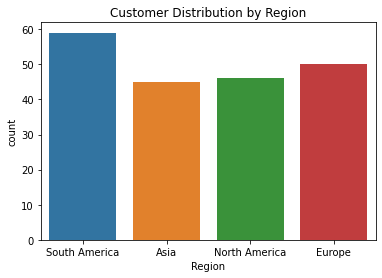

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Region', data=customers)      # Distribution of customers by region
plt.title('Customer Distribution by Region')
plt.show() 

In [ ]:
#Insight: South America has the highest number of customers (59), followed by Europe, North America, and Asia.

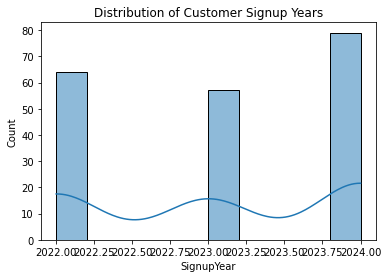

In [13]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
sns.histplot(customers['SignupYear'], bins=10, kde=True)
plt.title('Distribution of Customer Signup Years')
plt.show()

In [ ]:
#Insight: Most customers signed up in 2023 and 2024, indicating recent growth in customer acquisition.

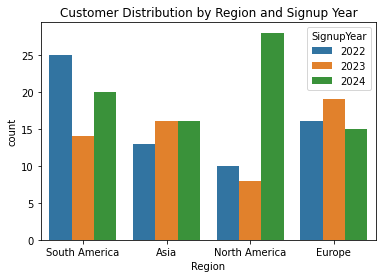

In [14]:
sns.countplot(x='Region', hue='SignupYear', data=customers)
plt.title('Customer Distribution by Region and Signup Year')
plt.show()

In [ ]:
#Insight: South America has consistently high signups across all years, while Asia has the lowest.

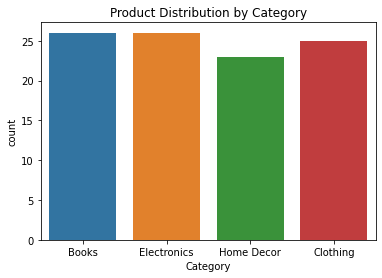

In [10]:
sns.countplot(x='Category', data=products)    # Distribution of product categories   
plt.title('Product Distribution by Category')
plt.show() 

In [ ]:
#Insight: The product distribution is well-balanced across categories, indicating a diversified inventory strategy.

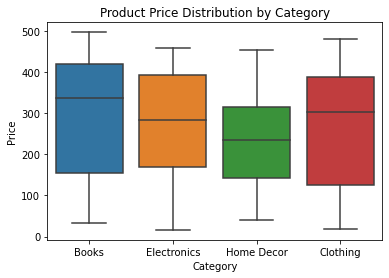

In [15]:
sns.boxplot(x='Category', y='Price', data=products)
plt.title('Product Price Distribution by Category')
plt.show()

In [ ]:
#Insight: Electronics is the most expensive category, while books are the least expensive. Home decor and clothing fall in the middle, with home decor having a slightly higher median price than clothing.

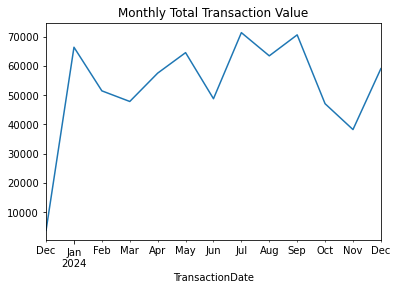

In [11]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])  # Total transaction value over time
transactions.set_index('TransactionDate', inplace=True)
transactions['TotalValue'].resample('M').sum().plot()
plt.title('Monthly Total Transaction Value')
plt.show()

In [ ]:
#The trend shows variability with no clear upward or downward pattern, indicating inconsistent behavior over the observed period.

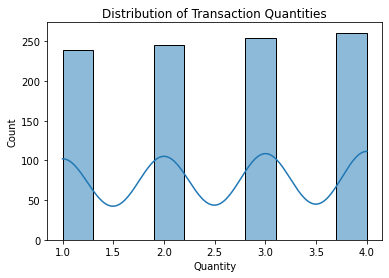

In [18]:
sns.histplot(transactions['Quantity'], bins=10, kde=True)
plt.title('Distribution of Transaction Quantities')
plt.show()

In [ ]:
#The bar heights remain consistent across categories, while the line graph shows a periodic pattern, indicating fluctuating trends overlaying stable overall metrics.

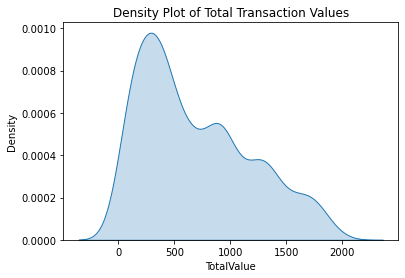

In [19]:
sns.kdeplot(transactions['TotalValue'], shade=True)
plt.title('Density Plot of Total Transaction Values')
plt.show()

In [ ]:
#The density plot suggests a positively skewed distribution, indicating that the majority of the data points are concentrated in the lower range, with a gradual decline as values increase.

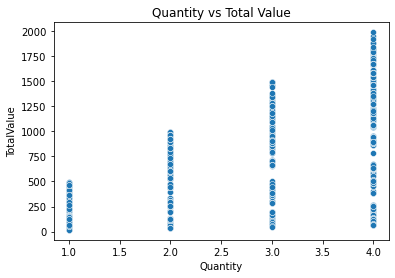

In [20]:
sns.scatterplot(x='Quantity', y='TotalValue', data=transactions)
plt.title('Quantity vs Total Value')
plt.show()

In [ ]:
#The scatter plot shows distinct clusters along the x-axis (Quantity) and y-axis (Total Value), indicating that higher quantities purchased lead to proportional increases in total value, likely reflecting consistent pricing across transactions.

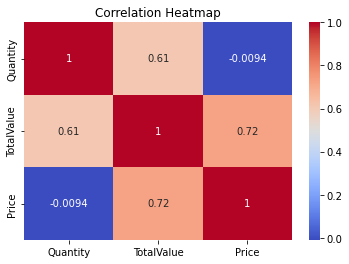

In [22]:
sns.heatmap(transactions[['Quantity', 'TotalValue', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Higher quantities lead to higher total value, and higher-priced items significantly impact total value, while quantity and price are mostly uncorrelated.

In [ ]:
#density plots:

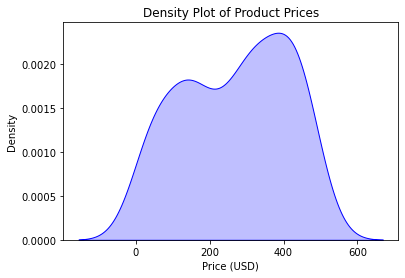

In [26]:
# Density plot for product prices
sns.kdeplot(products['Price'], shade=True, color='blue')
plt.title('Density Plot of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.show()

In [ ]:
#The density plot shows a bimodal distribution of prices, indicating the presence of two distinct price ranges, likely representing low-cost and high-cost product categories.

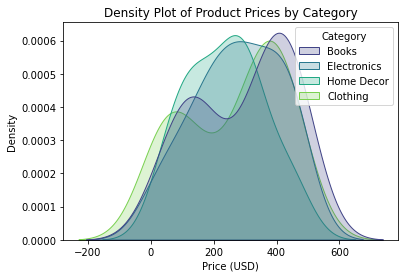

In [27]:
# Density plot for product prices by category
sns.kdeplot(data=products, x='Price', hue='Category', shade=True, palette='viridis')
plt.title('Density Plot of Product Prices by Category')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.show()

In [ ]:
#The density plot compares price distributions across categories. Electronics and Clothing exhibit higher price ranges, while Books and Home Decor are concentrated in lower price ranges, suggesting varied pricing strategies tailored to product types.

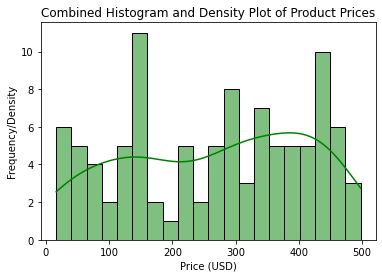

In [28]:
# Combined density plot and histogram for product prices
sns.histplot(products['Price'], kde=True, color='green', bins=20)
plt.title('Combined Histogram and Density Plot of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency/Density')
plt.show()

In [ ]:
#The histogram with density overlay shows that prices are distributed across a wide range, with some peaks suggesting popular price points and the density curve highlighting an overall balanced distribution.

In [7]:
# Group by ProductID
product_metrics = transactions.groupby('ProductID').agg({
    'Quantity': 'sum', 
    'TotalValue': 'sum',  
    'Price': 'mean'  
}).reset_index()

print(product_metrics.head())

  ProductID  Quantity  TotalValue   Price
0      P001        18     3047.40  169.30
1      P002        25     8657.50  346.30
2      P003        31     1367.72   44.12
3      P004        18     1722.42   95.69
4      P005        24    10303.44  429.31


In [8]:
# Group by CustomerID
customer_metrics = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',  
    'TotalValue': 'sum',  
    'Price': 'mean'  
}).reset_index()

print(customer_metrics.head())

  CustomerID  Quantity  TotalValue       Price
0      C0001        12     3354.52  278.334000
1      C0002        10     1862.74  208.920000
2      C0003        14     2725.38  195.707500
3      C0004        23     5354.88  240.636250
4      C0005         7     2034.24  291.603333


In [15]:
def plot_density(data, column, color='blue', shade=True, title=None, xlabel=None, ylabel='Density'):
    if title is None:
        title = f'Density Plot for {column}'
    if xlabel is None:
        xlabel = column

    plt.figure(figsize=(8, 6))
    sns.kdeplot(data[column], color=color, shade=shade)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


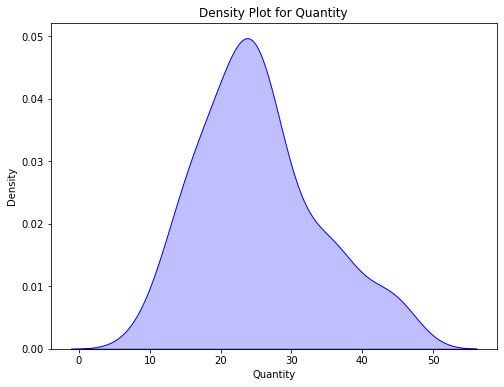

In [58]:
plot_density(product_metrics, 'Quantity')

In [ ]:
#The density plot of quantities grouped by ProductID indicates that most products are purchased in smaller quantities, with a gradual decline as the quantity increases, suggesting that individual purchases dominate over bulk orders.

In [25]:
# Group by ProductID and CustomerID
product_customer_metrics = transactions.groupby(['ProductID', 'CustomerID']).agg({
    'Quantity': 'sum',  
    'TotalValue': 'sum',  
    'Price': 'mean'  
}).reset_index()

print(product_customer_metrics.head())

  ProductID CustomerID  Quantity  TotalValue  Price
0      P001      C0017         3       507.9  169.3
1      P001      C0019         2       338.6  169.3
2      P001      C0024         4       677.2  169.3
3      P001      C0036         2       338.6  169.3
4      P001      C0045         2       338.6  169.3


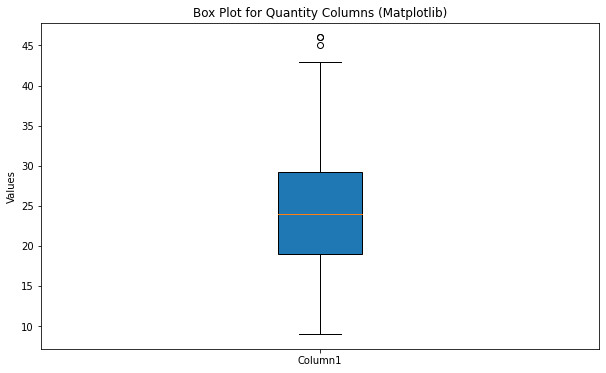

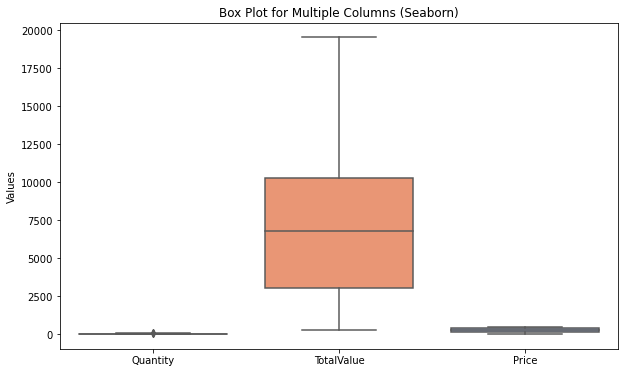

In [36]:
plt.figure(figsize=(10, 6))
plt.boxplot([product_metrics['Quantity']], labels=['Column1'], patch_artist=True)
plt.title('Box Plot for Quantity Columns (Matplotlib)')
plt.ylabel('Values')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=product_metrics, palette='Set2')
plt.title('Box Plot for Multiple Columns (Seaborn)')
plt.ylabel('Values')
plt.show()


In [ ]:
#Single Column Box Plot (Quantity): Most products have similar quantities sold, with a few outliers indicating exceptionally high-demand products.
#Multiple Metrics Box Plot: Revenue varies significantly across products, driven by differences in quantity sold and price, while prices remain relatively consistent.

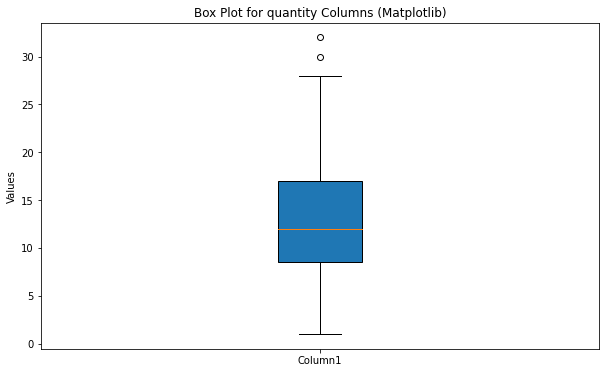

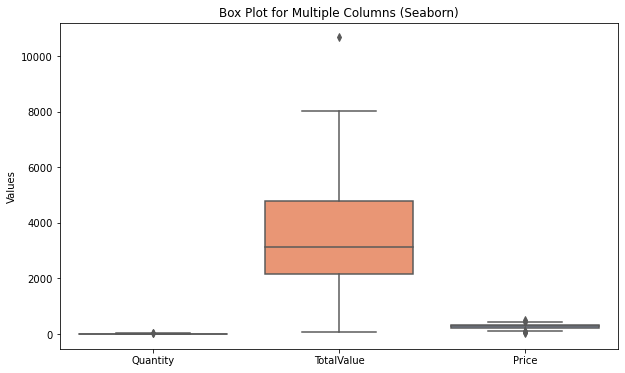

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot([customer_metrics['Quantity']], labels=['Column1'], patch_artist=True)
plt.title('Box Plot for quantity Columns (Matplotlib)')
plt.ylabel('Values')
plt.show()

# Box plot using seaborn (more concise and visually appealing)
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_metrics, palette='Set2')
plt.title('Box Plot for Multiple Columns (Seaborn)')
plt.ylabel('Values')
plt.show()


In [ ]:
#Single Column Box Plot (Quantity): Most customers have similar total purchase quantities, with a few high-value outliers indicating heavy buyers.
#Multiple Metrics Box Plot: Customer revenue (TotalValue) shows significant variation, while average prices are relatively consistent, highlighting that higher revenue comes from increased purchase quantities.

In [12]:
transaction_metrics = transactions.groupby('TransactionID').agg({
    'Quantity': 'sum',  
    'TotalValue': 'sum',  
    'Price': 'mean'  
}).reset_index()

print(transaction_metrics.head())

  TransactionID  Quantity  TotalValue   Price
0        T00001         1      300.68  300.68
1        T00002         2      434.10  217.05
2        T00003         4      958.80  239.70
3        T00004         4      591.80  147.95
4        T00005         2      580.34  290.17


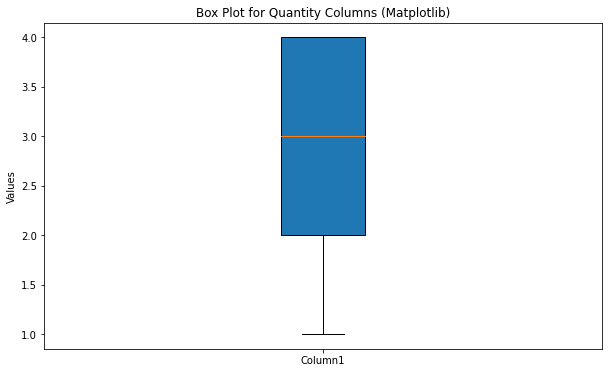

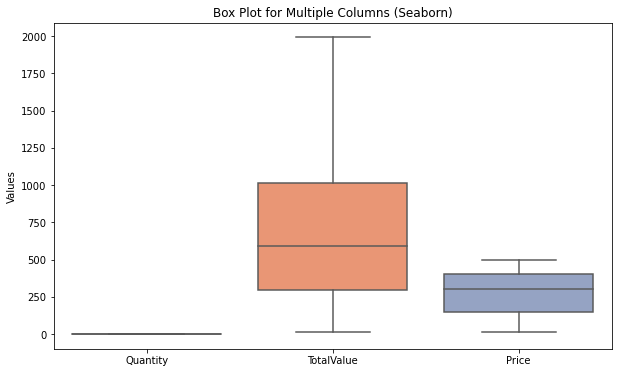

In [37]:
plt.figure(figsize=(10, 6))
plt.boxplot([transaction_metrics['Quantity']], labels=['Column1'], patch_artist=True)
plt.title('Box Plot for Quantity Columns (Matplotlib)')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=transaction_metrics, palette='Set2')
plt.title('Box Plot for Multiple Columns (Seaborn)')
plt.ylabel('Values')
plt.show()


In [ ]:
#Single Column Box Plot (Quantity): Transaction quantities show a balanced spread, with no extreme outliers, indicating consistent purchase patterns across transactions.
#Multiple Metrics Box Plot: Transaction total values vary significantly, while average prices are relatively stable across transactions, indicating that higher transaction values are driven by larger quantities rather than price changes.

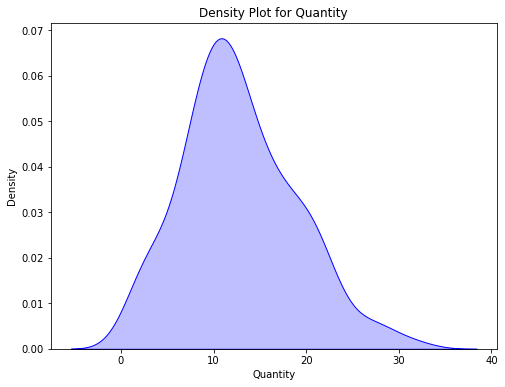

In [16]:
plot_density(customer_metrics, 'Quantity')

In [ ]:
#The plot shows a right-skewed distribution, indicating that most customers purchase smaller quantities, while a few make significantly larger purchases.

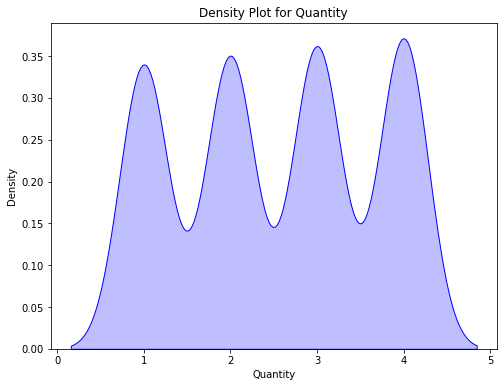

In [17]:
plot_density(transaction_metrics, 'Quantity')

In [ ]:
#The plot reveals a multimodal distribution, suggesting that transactions often involve specific recurring quantities, possibly reflecting common purchasing patterns or product bundling.

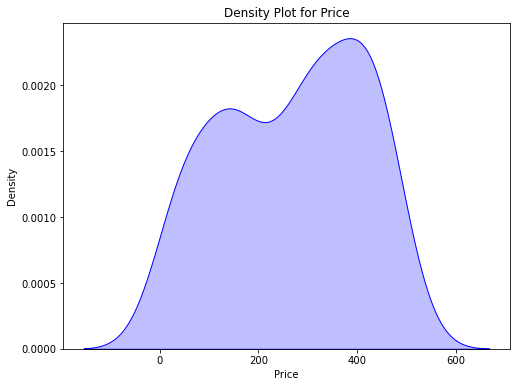

In [19]:
plot_density(product_metrics, 'Price')

In [ ]:
#The plot indicates a bimodal distribution, suggesting the presence of two distinct price ranges, likely representing low-cost and premium product categories.

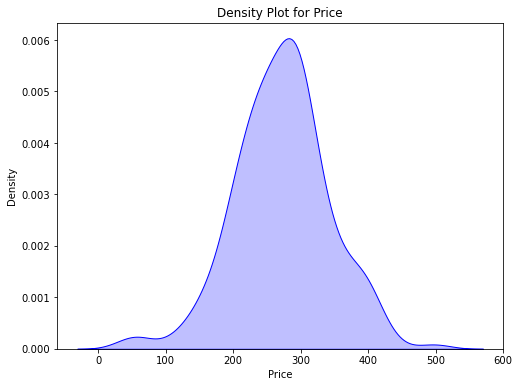

In [20]:
plot_density(customer_metrics, 'Price')

In [ ]:
# The plot shows a right-skewed distribution, indicating that most customers purchase items within a lower price range, with fewer opting for higher-priced products.

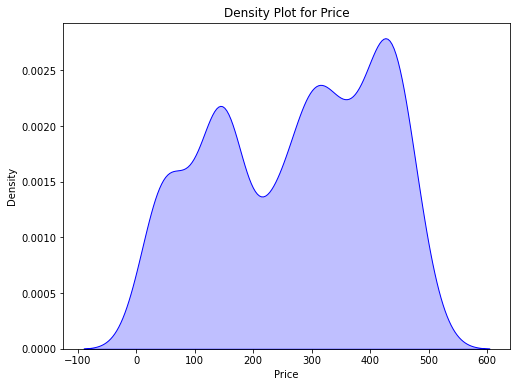

In [21]:
plot_density(transaction_metrics, 'Price')

In [ ]:
#The plot exhibits a multimodal distribution, indicating distinct pricing tiers across transactions, likely reflecting varied product price segments and customer preferences.

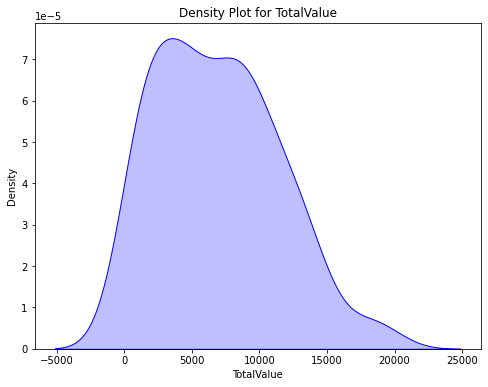

In [22]:
plot_density(product_metrics, 'TotalValue')

In [ ]:
#The plot shows a right-skewed distribution, indicating that most products generate moderate revenue, with a few high-revenue products driving significant contributions.

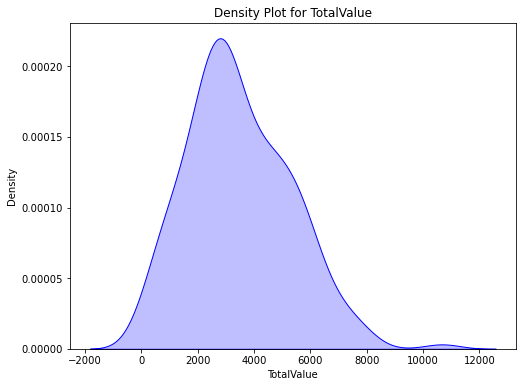

In [23]:
plot_density(customer_metrics, 'TotalValue')

In [ ]:
# The plot shows a right-skewed distribution, indicating that most customers contribute moderate revenue, while a few customers generate significantly higher total values.

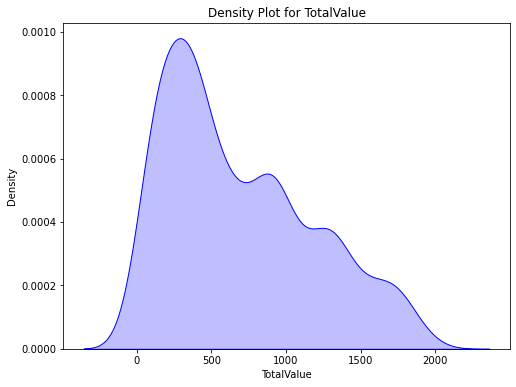

In [24]:
plot_density(transaction_metrics, 'TotalValue')

In [ ]:
# The plot exhibits a slightly right-skewed distribution, indicating that most transactions generate moderate revenue, with a few high-value transactions contributing significantly.

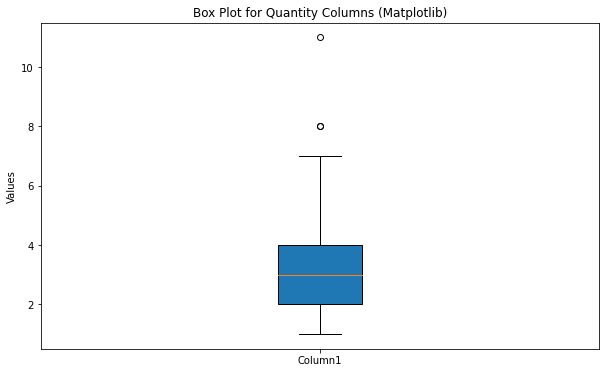

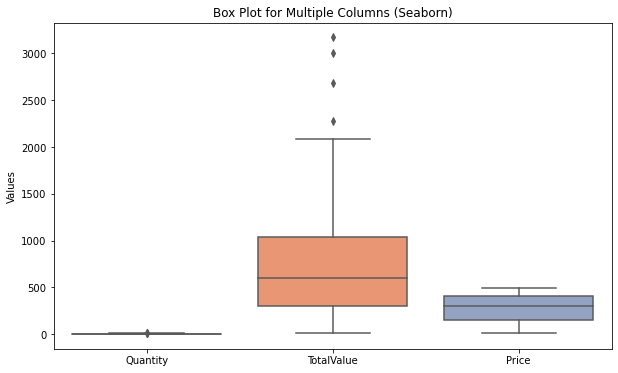

In [38]:
plt.figure(figsize=(10, 6))
plt.boxplot([product_customer_metrics['Quantity']], labels=['Column1'], patch_artist=True)
plt.title('Box Plot for Quantity Columns (Matplotlib)')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=product_customer_metrics, palette='Set2')
plt.title('Box Plot for Multiple Columns (Seaborn)')
plt.ylabel('Values')
plt.show()


In [ ]:
#Single Column Box Plot (Quantity): Most products and customers exhibit consistent purchase quantities, with a few high outliers indicating rare but significant purchases.
#Multiple Metrics Box Plot: Revenue (TotalValue) shows significant variability with multiple outliers, while average prices are relatively stable, indicating that larger transactions drive revenue spikes.

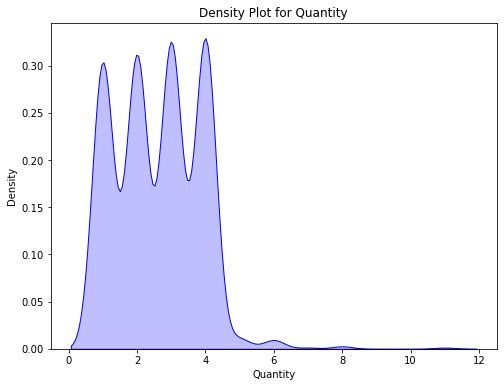

In [28]:
plot_density(product_customer_metrics, 'Quantity')

In [ ]:
#The plot exhibits a multimodal distribution, suggesting recurring purchase patterns with specific quantities, potentially driven by standard package sizes or common customer buying behaviors.

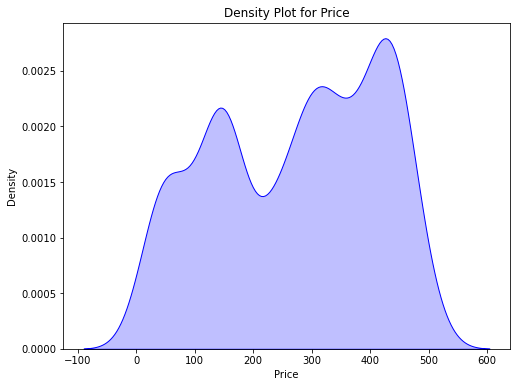

In [29]:
plot_density(product_customer_metrics, 'Price')

In [ ]:
# The plot shows a multimodal distribution, indicating distinct pricing tiers, likely reflecting a mix of low-cost and premium product offerings catering to varied customer segments.

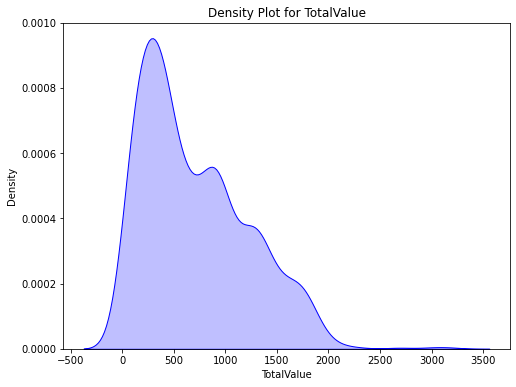

In [30]:
plot_density(product_customer_metrics, 'TotalValue')

In [ ]:
# The plot exhibits a right-skewed distribution, indicating that most product-customer interactions generate moderate revenue, while a few result in significantly higher total values.

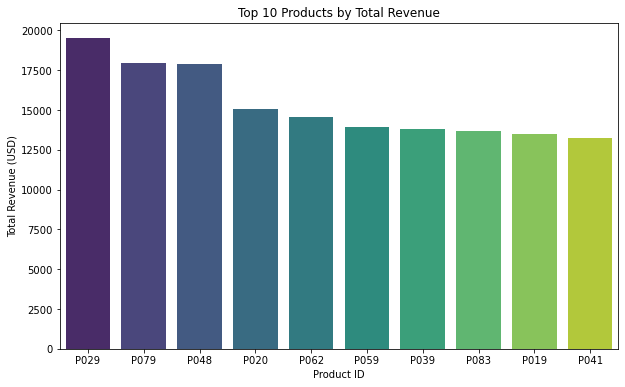

In [32]:
# Sorting products by total revenue and selecting top 10
top_products = product_metrics.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='ProductID', y='TotalValue', data=top_products, palette='viridis')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue (USD)')
plt.show()

In [ ]:
#The bar chart highlights the top 10 products by total revenue, showing that a few products significantly outperformed others, likely contributing disproportionately to overall revenue and indicating their strong market demand or premium pricing.

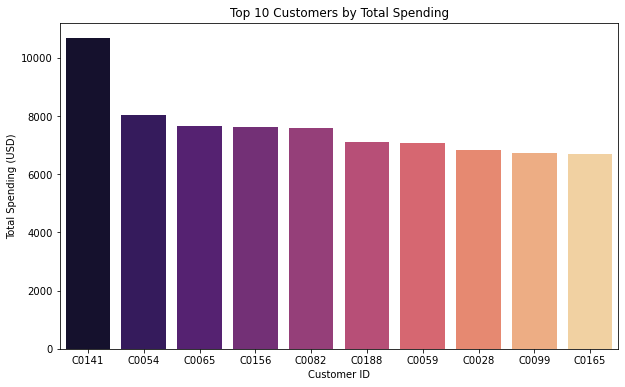

In [39]:
# Sorting customers by total spending and selecting top 10
top_customers = customer_metrics.sort_values(by='TotalValue', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='TotalValue', data=top_customers, palette='magma')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending (USD)')
plt.show()

In [ ]:
#The bar chart reveals the top 10 customers by total spending, indicating that a small group of customers contributes significantly to overall revenue, highlighting the importance of retaining these high-value customers through targeted engagement strategies.

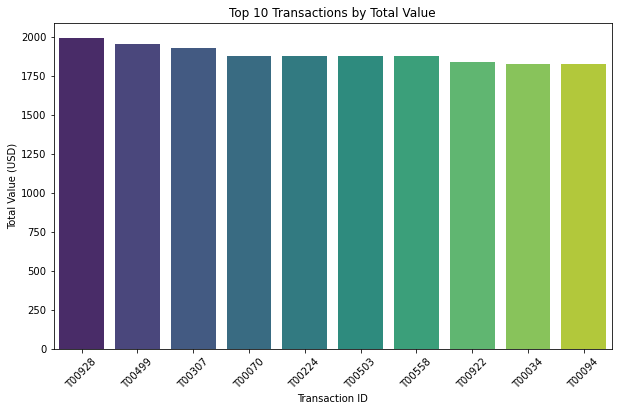

In [40]:
# Sorting transactions by total value and selecting top 10
top_transactions = transaction_metrics.sort_values(by='TotalValue', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='TransactionID', y='TotalValue', data=top_transactions, palette='viridis')
plt.title('Top 10 Transactions by Total Value')
plt.xlabel('Transaction ID')
plt.ylabel('Total Value (USD)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#The bar chart shows the top 10 transactions by total value, indicating that certain transactions involve significantly higher spending, likely driven by high-value products or bulk purchases. These high-value transactions are critical for revenue optimization strategies.

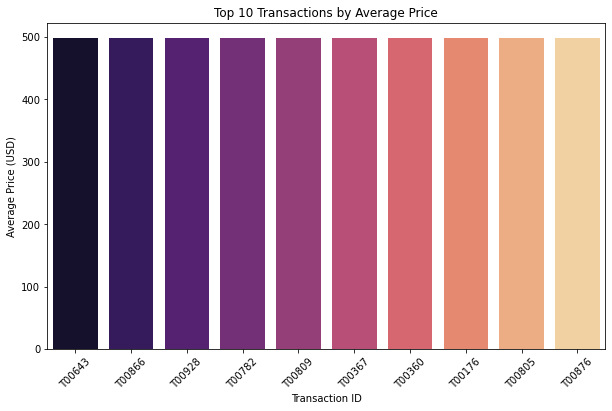

In [43]:
# Sorting transactions by average price and selecting top 10
top_transactions_price = transaction_metrics.sort_values(by='Price', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='TransactionID', y='Price', data=top_transactions_price, palette='magma')
plt.title('Top 10 Transactions by Average Price')
plt.xlabel('Transaction ID')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#The bar chart displays the top 10 transactions ranked by average price, indicating that these transactions involve high-priced items, which likely cater to premium segments and contribute significantly to profitability.

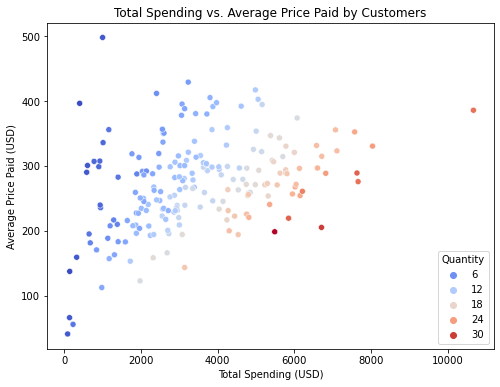

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalValue', y='Price', data=customer_metrics, hue='Quantity', palette='coolwarm')
plt.title('Total Spending vs. Average Price Paid by Customers')
plt.xlabel('Total Spending (USD)')
plt.ylabel('Average Price Paid (USD)')
plt.show()

In [ ]:
#The scatter plot shows the relationship between total spending and the average price paid by customers, colored by purchase quantity. Higher spending is generally associated with larger quantities purchased, while customers buying at higher average prices tend to have a lower quantity range. This suggests a mix of bulk buyers and premium customers.

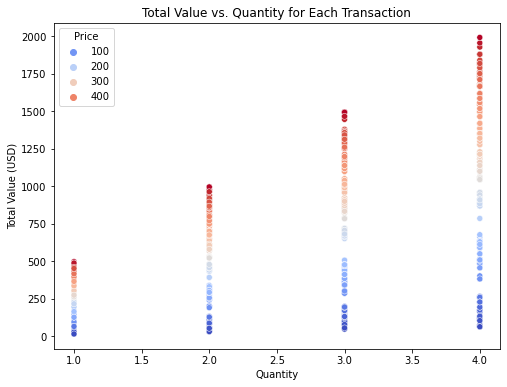

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='TotalValue', data=transaction_metrics, hue='Price', palette='coolwarm')
plt.title('Total Value vs. Quantity for Each Transaction')
plt.xlabel('Quantity')
plt.ylabel('Total Value (USD)')
plt.show()

In [ ]:
#The scatter plot illustrates the relationship between quantity and total value for each transaction, colored by price. Transactions with higher quantities result in higher total values, with variations in pricing influencing the overall revenue. This indicates that both bulk purchases and high-priced items contribute significantly to total transaction value.

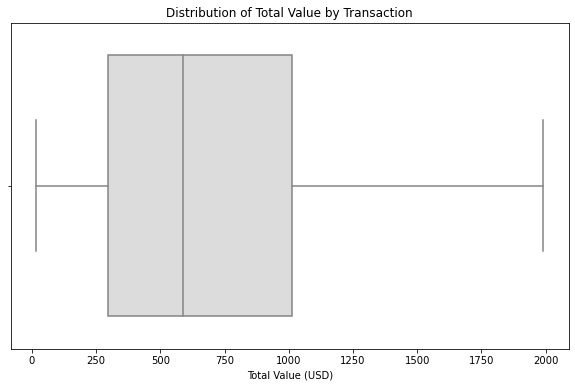

In [42]:
# Box plot for total value distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalValue', data=transaction_metrics, palette='coolwarm')
plt.title('Distribution of Total Value by Transaction')
plt.xlabel('Total Value (USD)')
plt.show()

In [ ]:
#The box plot shows the distribution of total transaction values. It indicates that most transactions fall within a moderate range, with no significant outliers, suggesting a consistent transaction value pattern across the dataset.

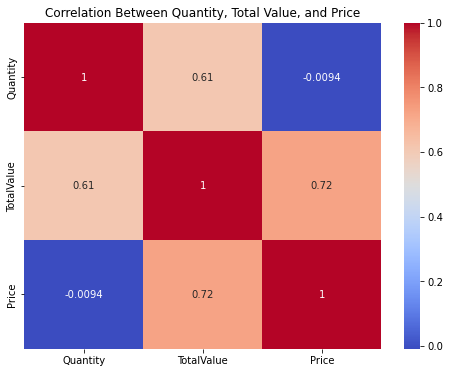

In [44]:
# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(transaction_metrics[['Quantity', 'TotalValue', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Quantity, Total Value, and Price')
plt.show()

In [ ]:
#The heatmap shows a strong positive correlation between quantity and total value (0.61) and between price and total value (0.72), indicating that both factors significantly impact transaction revenue, while quantity and price are almost uncorrelated (-0.0094).

In [45]:
# Group by TransactionID, CustomerID, and ProductID
grouped_data = transactions.groupby(['TransactionID', 'CustomerID', 'ProductID']).agg({
    'Quantity': 'sum',  
    'TotalValue': 'sum',  
    'Price': 'mean'  
}).reset_index()

print(grouped_data.head())

  TransactionID CustomerID ProductID  Quantity  TotalValue   Price
0        T00001      C0199      P067         1      300.68  300.68
1        T00002      C0092      P034         2      434.10  217.05
2        T00003      C0028      P057         4      958.80  239.70
3        T00004      C0004      P049         4      591.80  147.95
4        T00005      C0150      P087         2      580.34  290.17


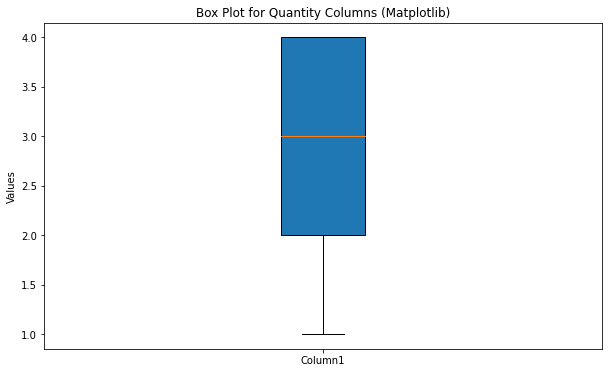

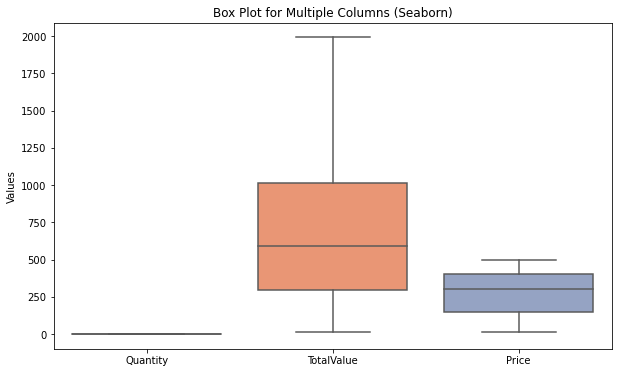

In [47]:
plt.figure(figsize=(10, 6))
plt.boxplot([grouped_data['Quantity']], labels=['Column1'], patch_artist=True)
plt.title('Box Plot for Quantity Columns (Matplotlib)')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_data, palette='Set2')
plt.title('Box Plot for Multiple Columns (Seaborn)')
plt.ylabel('Values')
plt.show()


In [ ]:
#Single Column Box Plot (Quantity): The majority of transactions involve moderate quantities, with a consistent distribution and no significant outliers.
#Multiple Metrics Box Plot: Total values show a wider spread, reflecting variability in transaction amounts, while prices are tightly distributed, indicating consistent product pricing across transactions.

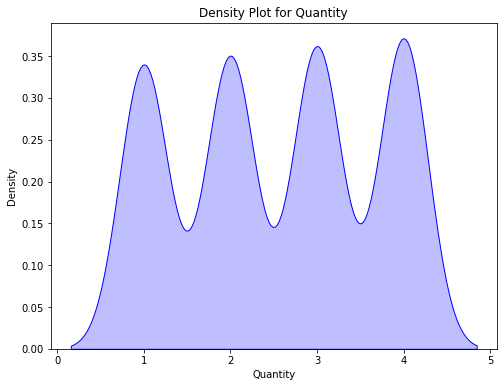

In [48]:
plot_density(grouped_data, 'Quantity')

In [ ]:
#The plot displays a multimodal distribution, suggesting distinct patterns of transaction quantities, possibly influenced by standard order sizes or customer purchasing behavior.

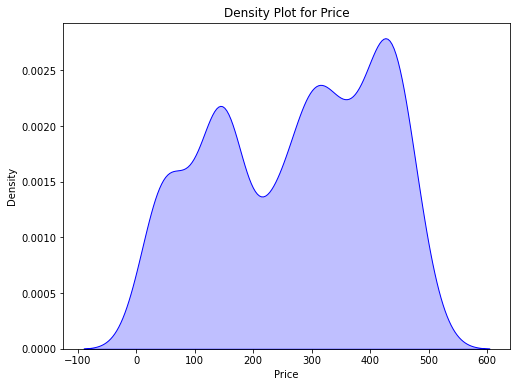

In [49]:
plot_density(grouped_data, 'Price')

In [ ]:
#The plot shows a multimodal distribution, indicating that transactions occur across distinct pricing tiers, likely reflecting varied product categories or customer preferences for premium and budget options.

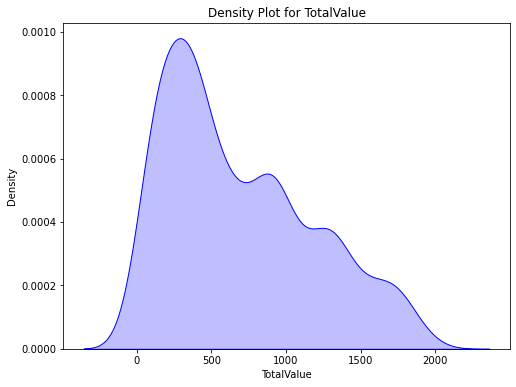

In [50]:
plot_density(grouped_data, 'TotalValue')

In [ ]:
#The plot shows a right-skewed distribution, indicating that while most transactions generate moderate revenue, a smaller number of transactions contribute significantly higher values.

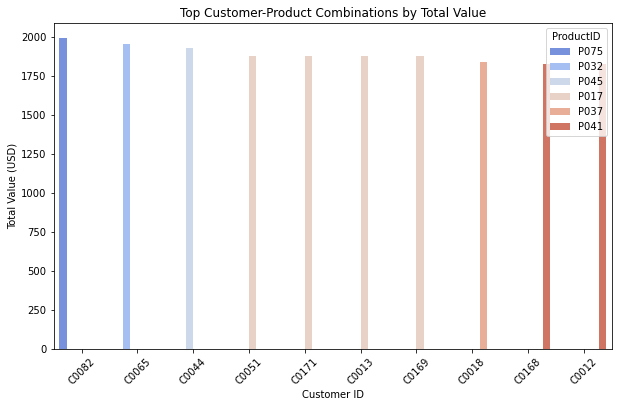

In [51]:
# Sorting by total value and selecting top 10
top_combinations = grouped_data.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='TotalValue', hue='ProductID', data=top_combinations, palette='coolwarm')
plt.title('Top Customer-Product Combinations by Total Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Value (USD)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#The bar chart highlights the top customer-product combinations by total value. It shows that specific customers contribute significantly to revenue through high-value purchases of particular products, emphasizing the importance of targeting and retaining these key customer-product relationships.